In [1]:
from scmaui.data import load_data
from scmaui.data import SCDataset
import os 

os.environ["CUDA_VISIBLE_DEVICES"]="-1" # This line is for avoiding tensorflow models to be allocated to GPUs

adatas = load_data(["../data/GSE194122/gex_preprocessed.hdf5", 
                    "../data/GSE194122/atac_preprocessed.hdf5"], names=['gex', 'atac'])

dataset = SCDataset(adatas, losses=["negbinom", "negbinom"],
                    union=True, adversarial=["DonorNumber"],
                    conditional=["DonorNumber"])
dataset

Inputs: non-missing/samples x features
	gex: 2498/2498 x 13431
	atac: 2498/2498 x 116490
Outputs:
	gex: 2498/2498 x 13431
	atac: 2498/2498 x 116490
1 Adversarials: ['DonorNumber']
1 Conditionals: ['DonorNumber']

In [2]:
from scmaui.ensembles import EnsembleVAE
from scmaui.utils import init_model_params

params = init_model_params()

modalities = dataset.modalities()
params['input_modality'] = modalities[0]
params['output_modality'] = modalities[1]
params['kl_weight'] = 0.3

params.update(dataset.adversarial_config())
params.update(dataset.conditional_config())
params.update({'losses': dataset.losses})

params


OrderedDict([('nunits_encoder', 32),
             ('nlayers_encoder', 5),
             ('nunits_decoder', 20),
             ('nlayers_decoder', 1),
             ('dropout_input', 0.1),
             ('dropout_encoder', 0.0),
             ('dropout_decoder', 0.0),
             ('nunits_adversary', 128),
             ('nlayers_adversary', 2),
             ('kl_weight', 0.3),
             ('nlatent', 10),
             ('nmixcomp', 1),
             ('input_modality', ['gex', 'atac']),
             ('output_modality', ['gex', 'atac']),
             ('adversarial_name', ['DonorNumber']),
             ('adversarial_dim', [2]),
             ('adversarial_type', ['category']),
             ('conditional_name', ['DonorNumber']),
             ('conditional_dim', [2]),
             ('conditional_type', ['category']),
             ('losses', ['negbinom', 'negbinom'])])

In [3]:
ensemble = EnsembleVAE(params=params, ensemble_size=1)

using vae


In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' # This line disables Tensorflow debugging information
train_loss = ensemble.fit(dataset, epochs=100, 
                          learning_rate=0.001, batch_size=128)

Run model 1
Epoch 1/100
17/17 - 17s - adv: 160.2422 - kl: 564.3136 - recon: 31493.7994 - loss: 31897.8706 - val_adv: 52.7279 - val_kl: 1863.8771 - val_recon: 12746.0137 - val_loss: 14557.1631
Epoch 2/100
17/17 - 16s - adv: 276.8046 - kl: 1680.9178 - recon: 11956.5696 - loss: 13360.6827 - val_adv: 153.0801 - val_kl: 1075.5087 - val_recon: 11349.2686 - val_loss: 12271.6973
Epoch 3/100
17/17 - 13s - adv: 248.9175 - kl: 727.3146 - recon: 11178.0485 - loss: 11656.4457 - val_adv: 68.2191 - val_kl: 569.7846 - val_recon: 11126.4346 - val_loss: 11628.0000
Epoch 4/100
17/17 - 13s - adv: 189.2761 - kl: 496.8049 - recon: 10948.0066 - loss: 11255.5355 - val_adv: 71.1802 - val_kl: 451.4759 - val_recon: 10970.6309 - val_loss: 11350.9258
Epoch 5/100
17/17 - 13s - adv: 177.0913 - kl: 410.3555 - recon: 10782.7713 - loss: 11016.0354 - val_adv: 55.3427 - val_kl: 368.8269 - val_recon: 10895.8066 - val_loss: 11209.2910
Epoch 6/100
17/17 - 13s - adv: 132.0158 - kl: 349.0841 - recon: 10683.1328 - loss: 10900.

Epoch 47/100
17/17 - 13s - adv: 198.6267 - kl: 79.6994 - recon: 10112.0537 - loss: 9993.1263 - val_adv: 59.5834 - val_kl: 61.5057 - val_recon: 10516.1836 - val_loss: 10518.1064
Epoch 48/100
17/17 - 13s - adv: 142.5376 - kl: 80.3891 - recon: 10098.0841 - loss: 10035.9357 - val_adv: 58.6532 - val_kl: 64.4299 - val_recon: 10514.7744 - val_loss: 10520.5508
Epoch 49/100
17/17 - 13s - adv: 139.0711 - kl: 79.1258 - recon: 10116.1796 - loss: 10056.2343 - val_adv: 51.7519 - val_kl: 62.2063 - val_recon: 10514.9639 - val_loss: 10525.4180
Epoch 50/100
17/17 - 13s - adv: 137.4847 - kl: 78.6637 - recon: 10075.2788 - loss: 10016.4580 - val_adv: 46.6547 - val_kl: 64.9043 - val_recon: 10521.3730 - val_loss: 10539.6230
Epoch 51/100
17/17 - 13s - adv: 181.0343 - kl: 81.2186 - recon: 10092.2108 - loss: 9992.3950 - val_adv: 69.8721 - val_kl: 63.6485 - val_recon: 10539.7559 - val_loss: 10533.5322
Epoch 52/100
17/17 - 15s - adv: 172.8790 - kl: 77.9806 - recon: 10095.9257 - loss: 10001.0273 - val_adv: 57.1126

Epoch 94/100
17/17 - 14s - adv: 156.6014 - kl: 59.0934 - recon: 9884.1907 - loss: 9786.6826 - val_adv: 64.9258 - val_kl: 41.5239 - val_recon: 10414.6221 - val_loss: 10391.2197
Epoch 95/100
17/17 - 14s - adv: 157.9137 - kl: 58.9167 - recon: 9878.7812 - loss: 9779.7841 - val_adv: 64.5762 - val_kl: 40.2571 - val_recon: 10412.2832 - val_loss: 10387.9639
Epoch 96/100
17/17 - 14s - adv: 157.4345 - kl: 58.9200 - recon: 9846.1336 - loss: 9747.6191 - val_adv: 64.0023 - val_kl: 40.8837 - val_recon: 10414.9609 - val_loss: 10391.8428
Epoch 97/100
17/17 - 13s - adv: 156.0323 - kl: 58.8403 - recon: 9857.7885 - loss: 9760.5965 - val_adv: 66.1750 - val_kl: 40.9052 - val_recon: 10416.2061 - val_loss: 10390.9365
Epoch 98/100
17/17 - 12s - adv: 152.9636 - kl: 59.1020 - recon: 9828.5216 - loss: 9734.6600 - val_adv: 64.8777 - val_kl: 39.9161 - val_recon: 10409.0498 - val_loss: 10384.0879
Epoch 99/100
17/17 - 13s - adv: 158.4537 - kl: 58.5807 - recon: 9834.8608 - loss: 9734.9877 - val_adv: 58.5783 - val_kl:

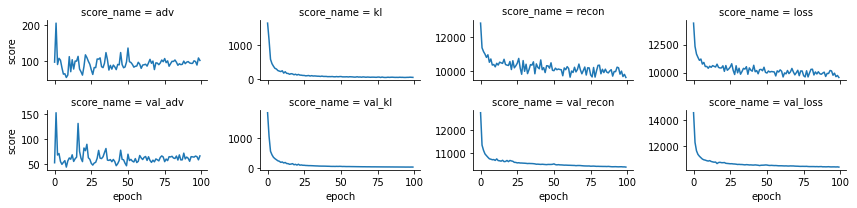

In [5]:
import pandas as pd
import seaborn as sns
train_history = [pd.DataFrame({"score":train_loss[0].history[k], 
                               "score_name":[k] * len(train_loss[0].history[k]),
                               "epoch":range(len(train_loss[0].history[k]))}) \
                for k in train_loss[0].history.keys()]
train_history = pd.concat(train_history)
g = sns.FacetGrid(train_history, col="score_name", sharey=False, height=1.5, aspect=2, col_wrap=4)
g.map_dataframe(sns.lineplot, x="epoch", y="score")

In [6]:
latent, latent_list = ensemble.encode(dataset)
latent

,D0-0,D0-1,D0-2,D0-3,D0-4,D0-5,D0-6,D0-7,D0-8,D0-9
TTACCTGTCTATGACA-1-s1d1,-2.721204,9.188824,2.888425,-3.938941,-7.749401,12.421721,-3.593198,-2.388148,5.049564,-19.885666
GGCAATCGTTAGGACC-1-s1d1,-0.651911,12.800862,-6.951048,-2.440306,8.174133,-2.346543,-3.416669,-13.494219,-5.457046,-1.152065
AATTTGCCATAATGAG-1-s1d1,-7.597717,8.809014,4.087528,-10.707133,-4.651574,13.694871,-8.371398,0.961154,4.315196,-15.898221
AGTTATGTCTCACTCA-1-s1d1,0.148071,12.791467,-7.619801,-4.857397,7.867189,-1.755790,0.658990,-12.602581,-2.984164,-3.195890
TGTATCGCAGCTCATA-1-s1d1,0.439743,7.638395,-1.359145,-3.972051,0.429510,9.498411,-3.975743,-2.049778,3.723244,-6.734437
...,...,...,...,...,...,...,...,...,...,...
CCGTTATGTGTCCAGG-2-s1d2,5.254988,-0.324096,-3.477962,-0.009903,-0.806690,7.552318,-4.525389,-4.432422,-4.011705,-7.749573
GTGAACAAGCAAGACA-2-s1d2,3.028051,2.171037,-6.982918,1.916383,1.533413,7.810496,-0.251748,-4.532604,-4.585779,-7.254684
TCCTTCAAGTTGGCCA-2-s1d2,0.419120,0.238627,-4.080522,-4.707624,1.092290,8.239433,-8.045282,-3.381485,0.963646,-3.980743
TATTAGCCAATTGAGA-2-s1d2,-2.471557,2.969372,-7.001022,-1.246425,1.483938,8.358441,-3.328221,-1.768488,-2.527726,-4.239036


In [7]:
latent.to_csv("../data/GSE194122/scmaui_res.csv", sep="\t", index=True)